<a href="https://colab.research.google.com/github/DanielaRandazo/coderhouse/blob/main/Data_StoryTelling_Randazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importo Librerias

In [1]:
from google.colab import drive
drive.mount('/CoderHouse')

Mounted at /CoderHouse


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
DF_IMDB = pd.read_csv('/CoderHouse/MyDrive/CoderHouse/IMDB.csv')

# ***"Un Viaje Cinematográfico a Través del Tiempo"***


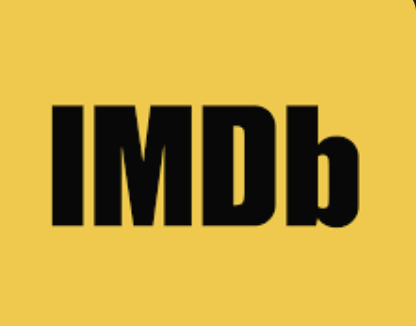

Introducción: El Nacimiento del Séptimo Arte

Hace más de un siglo, en el amanecer del siglo XX, nació el cine, una forma de arte que cautivaría a audiencias de todo el mundo. Desde sus humildes comienzos con películas mudas hasta las experiencias cinematográficas inmersivas de la actualidad, la industria ha experimentado una transformación asombrosa.




Escena 1: La Época Dorada de Hollywood

En las primeras décadas, Hollywood emergió como la capital mundial del cine. Las películas en blanco y negro dieron paso a las obras maestras en Technicolor, y los íconos como Chaplin y Greta Garbo llenaron las pantallas. Los géneros clásicos como el cine negro y el musical dominaron la escena, ofreciendo a los espectadores una vía de escape durante tiempos difíciles, como la Gran Depresión y la Segunda Guerra Mundial.

Escena 2: Revolución Tecnológica y Diversificación de Géneros

Con el paso del tiempo, la tecnología revolucionó la forma en que se hacían y se veían las películas. El surgimiento del cine en color, el sonido envolvente y los efectos especiales llevaron a la creación de géneros completamente nuevos. De los westerns de la década de 1950 a la fiebre del sci-fi en los años 80, la diversificación de los géneros ofreció a los espectadores opciones emocionantes y variadas.

Escena 3: El Surgimiento de la Era Digital y la Globalización

La llegada de la era digital en las últimas décadas del siglo XX cambió radicalmente la forma en que se producían, distribuían y consumían películas. La globalización permitió la influencia de cineastas de todo el mundo, dando lugar a una rica mezcla de estilos y perspectivas. Los géneros como el cine independiente y el cine de autor ganaron popularidad, ofreciendo narrativas alternativas y desafiando las convenciones establecidas.

Escena 4: La Era de la Transmedia y la Experiencia del Consumidor

En el siglo XXI, la industria cinematográfica se ha expandido más allá de las salas de cine tradicionales. Las plataformas de transmisión en línea han permitido a los espectadores acceder a una amplia variedad de contenidos desde la comodidad de sus hogares. La narrativa se ha vuelto más interactiva con experiencias transmedia, donde historias se entrelazan a través de películas, series, libros y juegos.



Conclusión: Un Futuro de Posibilidades Ilimitadas

En el siglo XXI, la industria cinematográfica continúa evolucionando. Con avances tecnológicos como la realidad virtual y la inteligencia artificial, y la creciente diversidad en la representación en pantalla, el cine está listo para seguir desafiando límites y ofrecer experiencias más enriquecedoras. La elección de géneros por parte de los consumidores se ha convertido en un acto de exploración, donde la variedad es la clave para satisfacer gustos cada vez más diversos.

# Visualizaciones graficas

Si bien en este grafico no tenemos data desde el inicio podemos visualizar la evolucion de los principales generos en los ultimos 30 anios, lo que nos puede ayudar a analizar la evolucion a lo largo de los anios.

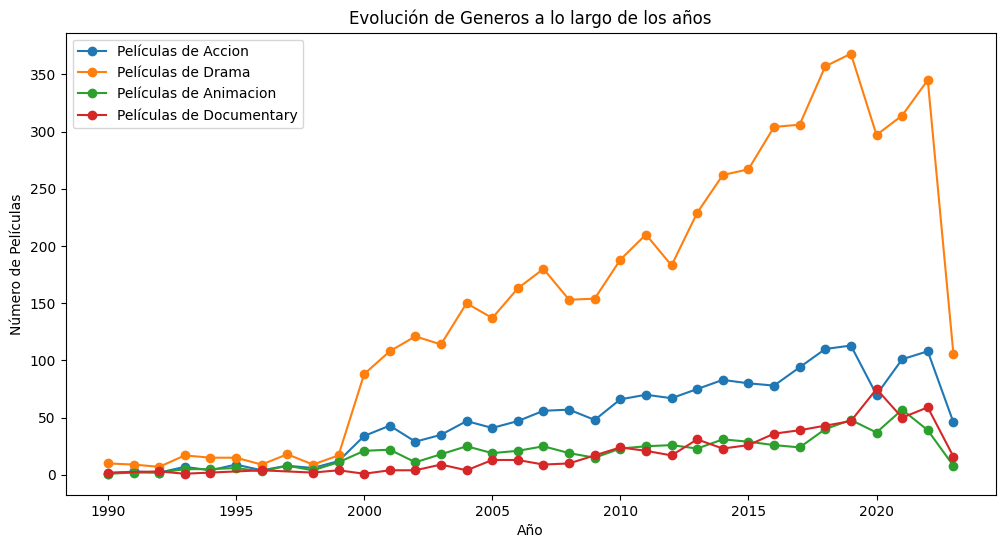

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

peliculas_de_accion = DF_IMDB[DF_IMDB['genres'].str.contains('Action', case=False, na=False)]
df_accion = peliculas_de_accion.copy()

peliculas_de_drama = DF_IMDB[DF_IMDB['genres'].str.contains('Drama', case=False, na=False)]
df_drama = peliculas_de_drama.copy()

peliculas_de_animation = DF_IMDB[DF_IMDB['genres'].str.contains('Animation', case=False, na=False)]
df_animation = peliculas_de_animation.copy()

peliculas_de_documentary = DF_IMDB[DF_IMDB['genres'].str.contains('Documentary', case=False, na=False)]
df_documentary = peliculas_de_documentary.copy()


# Agrupo y cuento la cantidad de películas de acción por año
accion_counts = df_accion.groupby('startYear').size()

# Agrupo y cuento la cantidad de películas de drama por año
drama_counts = df_drama.groupby('startYear').size()

# Agrupo y cuento la cantidad de películas de animation por año
animation_counts = df_animation.groupby('startYear').size()

# Agrupo y cuento la cantidad de películas de animation por año
documentary_counts = df_documentary.groupby('startYear').size()


# Creo un gráfico de líneas para visualizar la evolución
plt.figure(figsize=(12, 6))
plt.plot(accion_counts.index, accion_counts.values, label='Películas de Accion', marker='o')
plt.plot(drama_counts.index, drama_counts.values, label='Películas de Drama', marker='o')
plt.plot(animation_counts.index, animation_counts.values, label='Películas de Animacion', marker='o')
plt.plot(documentary_counts.index, documentary_counts.values, label='Películas de Documentary', marker='o')

plt.title('Evolución de Generos a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.legend()

plt.show()




# Analisis de las preferencias del publico:


# **Abstracto:**
Pretendemos analizar las preferencias del publico en cuanto a la produccion cinematografica, esto resulta particularmente complicado en un mundo donde esta industria evoluciona constantemente. Vamos a analizar un amplio conjunto de datos con el objetivo de identificar patrones y tendencias lo mas precisas que podamos, tendencias relacionadas con la motivaciones detras de la creacion de peliculas y su audiencia objetivo.

# **Motivación:**
Bajo el complejo contexto donde la produccion cinematrografica es una empresa muy costosa y con muchos riesgos donde hay que tener muchos conocimientos del mercado y la audiencia el analisis es indispensable para la diferencia entre el exito o el fracaso de la industria. Nuestra motivación radica en analizar la información proporcionada por el conjunto de datos para identificar las principales razones que impulsan la creación de películas.
¿Qué géneros evolucionaron a travez del tiempo? ¿Cuál es la relación entre la calificación promedio y la cantidad de votos? ¿Cómo ha evolucionado la duración de las películas a lo largo del tiempo? Estas son algunas de las preguntas que nos proponemos responder.

# **Audiencia:**
Este trabajo está dirigido a investigadores, productores de cine y profesionales de la industria del cine interesados en comprender mejor la dinámica de la producción cinematográfica y las preferencias del público. Los resultados de este estudio pueden servir como guía para la toma de decisiones en la producción de películas y la identificación de oportunidades de mercado.

En resumen, este trabajo utiliza un conjunto de datos detallado de películas para arrojar luz sobre la motivación detrás de la creación de películas y su audiencia objetivo, con el objetivo de proporcionar información valiosa para la industria cinematográfica en constante cambio.




# **Objetivo:**
Analizar la progresión a lo largo del tiempo de las películas en los géneros de "Drama" y "Acción" con el propósito de identificar posibles disparidades significativas en la evolución de ambas categorías.
Para ello trabajaremos dos Hipotesis, una Nula y otra Alternativa.

# Hipótesis Nula (H0):
No existe una diferencia significativa en la evolución de las películas de género "Drama" en comparación con las películas de género "Acción". En otras palabras, la evolución promedio de las películas de ambos géneros es igual.


# Hipótesis Alternativa (H1):
Existe una diferencia significativa en la evolución de las películas de género "Drama" en comparación con las películas de género "Acción". Esto implica que la evolución promedio de las películas de un género es mayor o menor que la del otro género.




 ***# Analisis Exploratorio de Datos***

Una hipotesis presentada fue "Las películas de género "Acción" tienen una evolucion significativamente mayor que las películas de género "Drama".

Llegamos a la siguiente conclusion:
Nuestro análisis de la industria cinematográfica a lo largo de décadas revela una tendencia interesante en la evolución de los géneros de películas. En particular, hemos observado que las películas de drama han experimentado un cambio significativo a través de los años, mucho más pronunciado en comparación con las películas de acción.

A lo largo de las décadas, las películas de drama han demostrado una notable versatilidad y adaptación a las cambiantes preferencias y sensibilidades de la audiencia. Esto se refleja en la creación de historias con una variedad de temas y enfoques narrativos, que van desde el clásico drama romántico hasta el drama histórico, social o psicológico. Este enfoque diversificado ha permitido que el género del drama siga siendo relevante y atractivo para una audiencia amplia y en constante cambio.

En contraste, las películas de acción, aunque consistentemente populares, muestran una evolución menos marcada. A pesar de seguir siendo una elección predominante para los amantes de la emoción y la adrenalina, el género de acción ha mantenido un enfoque más constante en las secuencias de acción espectaculares y los héroes de acción carismáticos a lo largo de los años.

Si bien ambas categorías cinematográficas tienen su propio atractivo y han contribuido significativamente a la industria del cine, el género del drama ha demostrado ser particularmente adaptable y capaz de mantener su relevancia en una audiencia que busca una variedad de experiencias cinematográficas. Este análisis subraya la capacidad del drama para evolucionar y reinventarse a lo largo del tiempo, reflejando las cambiantes dinámicas culturales y sociales que influyen en la narración cinematográfica.



# Ahora realizamos un Analisis Exploratorio de Datos paso a paso:

# Paso 1: Carga y Exploración del Conjunto de Datos
Cargamos el conjunto de datos a analizar y verificamos las columnas necesarias para nuestro analisis. "startYear" y "genres".


# Paso 2: Filtrado de Datos
Creo dos subconjuntos de datos separados: uno para las películas de acción y otro para las películas de drama. Filtro las filas en función del género.

# Paso 3: Agregación de Datos
Agrupo las películas por año y cuento cuántas películas de acción y cuántas de drama se lanzaron cada año. Esto da una idea de cómo ha evolucionado la cantidad de películas en cada género a lo largo del tiempo.

# Paso 4: Visualización de Datos
Para visualizar mis hallazgos, creo gráficos y comparo para una forma facil de ver los datos.

# Paso 5: Análisis de Resultados
Observo la tendencia a lo largo del tiempo. ¿Qué género ha sido más popular en cada año? ¿Se ha mantenido constante la preferencia por las películas de acción o ha habido cambios significativos a lo largo de las décadas?




# Analisis de valores nulos:

In [ ]:
DF_IMDB.dtypes

Unnamed: 0           int64
index                int64
tconst              object
titleType           object
primaryTitle        object
originalTitle       object
isAdult              int64
startYear            int64
endYear             object
runtimeMinutes      object
genres              object
averageRating      float64
numVotes             int64
ordering             int64
title               object
region              object
language            object
types               object
attributes          object
isOriginalTitle      int64
Description         object
dtype: object

In [ ]:
DF_IMDB.isna().sum()

Unnamed: 0           0
index                0
tconst               0
titleType            0
primaryTitle         0
originalTitle        0
isAdult              0
startYear            0
endYear              0
runtimeMinutes       0
genres               0
averageRating        0
numVotes             0
ordering             0
title                0
region               0
language             0
types                0
attributes           0
isOriginalTitle      0
Description        188
dtype: int64

¿La distribución de géneros cinematográficos ha evolucionado a lo largo de los años? ¿Es posible que ciertos géneros sean más comunes en ciertas décadas?

Analizando la evolución de los géneros cinematográficos a lo largo de las décadas, se puede examinar que la distribución de géneros se ha mantenido relativamente constante en el tiempo. Si bien ha habido fluctuaciones y cambios menores en la popularidad de géneros específicos en diferentes décadas, en general, no hemos observado una tendencia clara hacia la dominación de un género particular en una década en particular.

Nuestros gráficos y datos revelan que la producción cinematográfica ha experimentado un crecimiento significativo a lo largo de las décadas, abarcando una amplia variedad de géneros. Esto sugiere que la industria cinematográfica ha sido diversa y ha crecido significativamente a lo largo del tiempo.

En resumen, la evolución de los géneros ha ido en crecimiento constante y parejo a lo largo de las decadas.



<Figure size 2000x800 with 0 Axes>

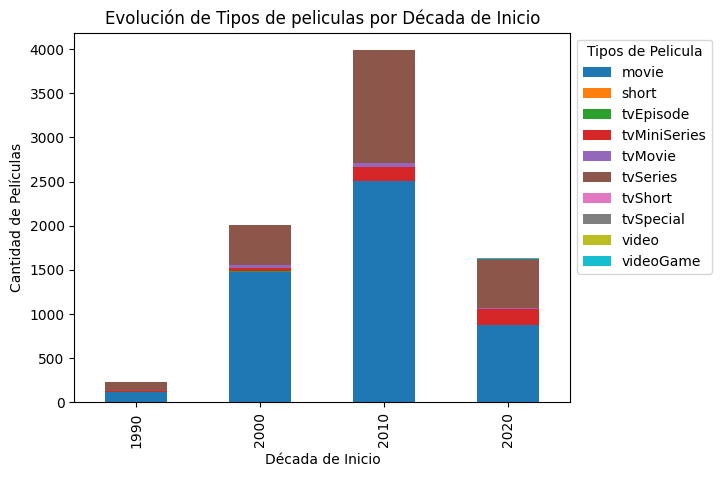

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupo el conjunto de datos por década y tipos y cuento la cantidad de películas en cada grupo.
DF_IMDB['decade'] = (DF_IMDB['startYear'] // 10) * 10  # Agrupo por décadas
genre_decade_counts = DF_IMDB.groupby(['decade', 'titleType']).size().unstack(fill_value=0)

# Gráfico de barras apiladas para la evolución de tipos de pelis a lo largo de las décadas.
plt.figure(figsize=(20, 8))
genre_decade_counts.plot(kind='bar', stacked=True)
plt.xlabel('Década de Inicio')
plt.ylabel('Cantidad de Películas')
plt.title('Evolución de Tipos de peliculas por Década de Inicio')
plt.legend(title='Tipos de Pelicula', bbox_to_anchor=(1, 1))

# Muestro el gráfico
plt.show()


## Problema Analítico:

El problema analítico relacionado con el análisis evolutivo de géneros en la industria cinematográfica a lo largo de los años implica cómo utilizar datos históricos de películas para tomar decisiones informadas sobre la producción y promoción de géneros específicos. Esto requiere el análisis y la visualización de datos para identificar patrones de cambio en la popularidad de los géneros a lo largo del tiempo.

Un enfoque específico para el problema analítico podría ser la realización de un análisis de tendencias a largo plazo de los géneros cinematográficos, utilizando datos históricos de películas. Esto podría incluir la creación de gráficos que muestren la evolución de géneros a lo largo de décadas, la identificación de géneros en ascenso o declive, y la determinación de si ciertos géneros experimentan ciclos de popularidad.

El objetivo del análisis va a ser para nosotros proporcionar información valiosa para que las empresas cinematográficas tomen decisiones estratégicas sobre la producción y promoción de películas en función de las tendencias históricas y las preferencias cambiantes del público.

Este enfoque analítico puede ayudar a las empresas cinematográficas a optimizar sus inversiones y a alinear su cartera de películas con las oportunidades comerciales en la industria.

## Contexto Comercial en la Industria Cinematográfica:

Diversidad de Géneros: En el mundo del cine, se producen una amplia variedad de géneros que van desde el drama y la comedia hasta la acción, ciencia ficción, y géneros más especializados como el cine de terror o el documental. ¿Cómo pueden las empresas cinematográficas determinar qué géneros son más atractivos para el público en un momento dado?

Ciclos de Popularidad: ¿Existen ciclos de popularidad en la industria cinematográfica donde ciertos géneros experimentan picos de interés en diferentes períodos? Si es así, ¿cómo pueden las empresas aprovechar estos ciclos para maximizar sus ganancias?

Cambios en las Preferencias del Público: Las preferencias del público evolucionan con el tiempo debido a cambios culturales, sociales y tecnológicos. ¿Cómo pueden las empresas cinematográficas anticipar y adaptarse a estas cambiantes preferencias del público?

Inversiones en Marketing y Producción: La producción y promoción de películas son costosas, y las empresas necesitan asegurarse de que sus inversiones sean rentables. ¿Cómo pueden evaluar de manera efectiva la relación entre el presupuesto de una película y su rendimiento en taquilla, teniendo en cuenta el género?

Competencia Feroz: La competencia en la industria cinematográfica es intensa, con múltiples estudios y empresas compitiendo por la atención de las audiencias. ¿Cómo pueden las empresas mantenerse competitivas y destacar en un mercado saturado de películas?

Impacto de las Plataformas de Streaming: La proliferación de plataformas de streaming ha cambiado la forma en que las películas se distribuyen y consumen. ¿Cómo pueden las empresas tradicionales de cine competir y colaborar con estos nuevos actores en el mercado?


## Problema Comercial y Analítico:

El problema comercial se centra en la necesidad de tomar decisiones estratégicas en la selección de géneros cinematográficos para maximizar los ingresos y la inversión en un mercado altamente competitivo. El problema analítico implica cómo utilizar datos históricos para tomar decisiones informadas sobre la producción y promoción de géneros específicos. Algunas preguntas clave que se derivan de este contexto son:

¿Cómo identificar tendencias en la popularidad de los géneros cinematográficos a lo largo del tiempo?

¿Cuáles son los géneros que han demostrado un rendimiento sólido en términos de taquilla a lo largo de los años?

¿Existen diferencias significativas en la evolución de géneros específicos, como 'Drama' y 'Acción', que justifiquen decisiones estratégicas?

¿Cómo pueden las empresas utilizar el análisis de datos para predecir las preferencias futuras del público y adaptar sus estrategias comerciales en consecuencia?

¿Cuáles son las mejores prácticas en la toma de decisiones estratégicas basadas en análisis de datos en la industria cinematográfica?









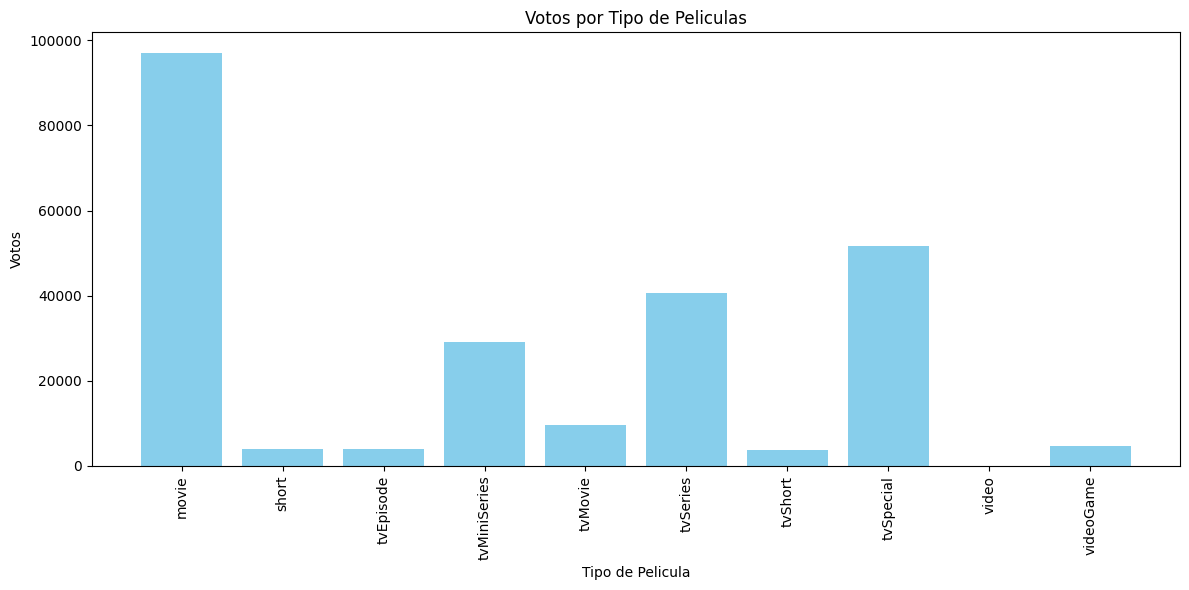

In [ ]:
#Matplotlib #2

Types = DF_IMDB.groupby('titleType')['numVotes'].mean().reset_index()

# Creo el gráfico de barras por tipo de pelis
plt.figure(figsize=(12, 6))
plt.bar(genre_ratings['titleType'], genre_ratings['numVotes'], color='skyblue')
plt.xlabel('Tipo de Pelicula')
plt.ylabel('Votos')
plt.title('Votos por Tipo de Peliculas')
plt.xticks(rotation=90)  # Roto las etiquetas del eje x para que sean legibles

# Muestro mi gráfico
plt.tight_layout()
plt.show()








---

